# 1. Data Collection - Healthcare Dataset - collected from

https://www.kaggle.com/kumarajarshi/life-expectancy-who/code

# Domain: Health Care

## Topic: Life Expectancy (WHO)

###  Description

**About this data**

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

**Context**

Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

**Content**

The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

**Acknowledgements**

The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.

**Inspiration**

The data-set aims to answer the following key questions:

> Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

> Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

> How does Infant and Adult mortality rates affect life expectancy?

> Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

> What is the impact of schooling on the lifespan of humans?

> Does Life Expectancy have positive or negative relationship with drinking alcohol?

> Do densely populated countries tend to have lower life expectancy?

> What is the impact of Immunization coverage on life Expectancy?

In [ ]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

%matplotlib inline


# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

### 1. Read the dataset to the python environment.

In [ ]:
# Loading the csv file into a pandas dataframe.
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Week 12/Life_Expectancy_Data.csv')

In [ ]:
# Display the data
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# number of elements in each dimension (Rows and Columns)
data.shape

(2938, 22)

In [ ]:
# Summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
# Display the columns in the dataset
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

From the Life Expectancy (WHO) dataset :

2938 samples with 22 features including Country, Year, Status, Life expectancy, Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles, BMI, under-five deaths, Polio, Total expenditure, Diphtheria, HIV/AIDS, GDP, Population, thinness  1-19 years,thinness 5-9 years,Income composition of resources and Schooling.

### 2. Pre-processing steps

In [ ]:
# check the data type for all features in the dataset
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

Now, we need to check whether any null or missing values present in the iris dataset

In [ ]:
# Calculating the null values present in each columns in the dataset (Before treatment)
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
# Display the data before missing values treatment
data[data.isna().any(axis=1)] # check at least one null values in a row 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,47.0,23,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,46.1,23,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,45.3,24,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,44.4,25,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,17.6,62,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,17.3,66,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,17.1,70,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,16.8,72,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


As you can see that there are 1289 rows having the null or missing values present in the Life Expectancy (WHO) dataset. The features  Life expectancy, Adult Mortality, Alcohol, Hepatitis B, BMI, Polio, Total expenditure, Diphtheria, GDP, Population, thinness 1-19 years,thinness 5-9 years,Income composition of resources and Schooling are having the null or missing values. we can treat the null or missing values. We can use plots and summary statistics to help identify missing or corrupt data.

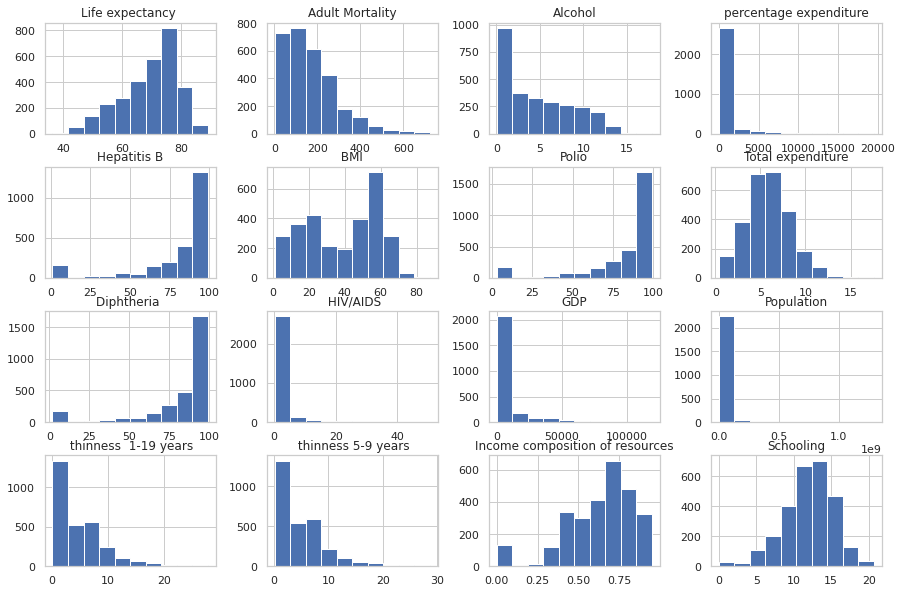

In [ ]:
# we can plot the frequency graph for treating missing values by using mean/median/mode
freq_graph = data.select_dtypes(include=['float64'])
freq_graph.hist(figsize=(15,10))
plt.show()

From the graph, we can observe that, Life expectancy ,BMI,Total expenditure, Income composition of resources and Schooling are closer to normal distribution so we can treat missing values for these features using mean method. And Adult Mortality Alcohol, Hepatitis B,Polio,Diphtheria, GDP, Population,
thinness  1-19 years and thinness 5-9 years are not follows normal distribution but they are right or left skewed so we can treat missing values for these features using median.

In [ ]:
# Display the columns in the dataset
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
# The Statistical summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


**Treating missing values**

In [ ]:
# fill the missing values

# Features with Normally distributed
missing_val1 = ['Life expectancy ',' BMI ','Total expenditure','Income composition of resources', 'Schooling']
for i in missing_val1:
    data[i] = data[i].fillna(data[i].mean())

# Features with right or left skewed
missing_val2 = ['Adult Mortality', 'Alcohol', 'Hepatitis B','Polio','Diphtheria ', 'GDP', 'Population',
                ' thinness  1-19 years', ' thinness 5-9 years'] 

for i in missing_val2:
    data[i] = data[i].fillna(data[i].median())


In [ ]:
# Calculating the null values present in each columns in the dataset (After treatment)
data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
# Display the data after missing values treatment
data[data.isna().any(axis=1)] # check at least one null values in a row 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


As you can see that it is treated well for missing or null values. Now the Life Expectancy (WHO)
dataset is completely treated with no null or missing values

In [ ]:
# checking the number of elements in each dimension (Rows and Columns)
data.shape

(2938, 22)

In [ ]:
# Display the columns in the dataset
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

**Finding Outliers**

Now we have to find any outliers present in the Life Expectancy (WHO) dataset


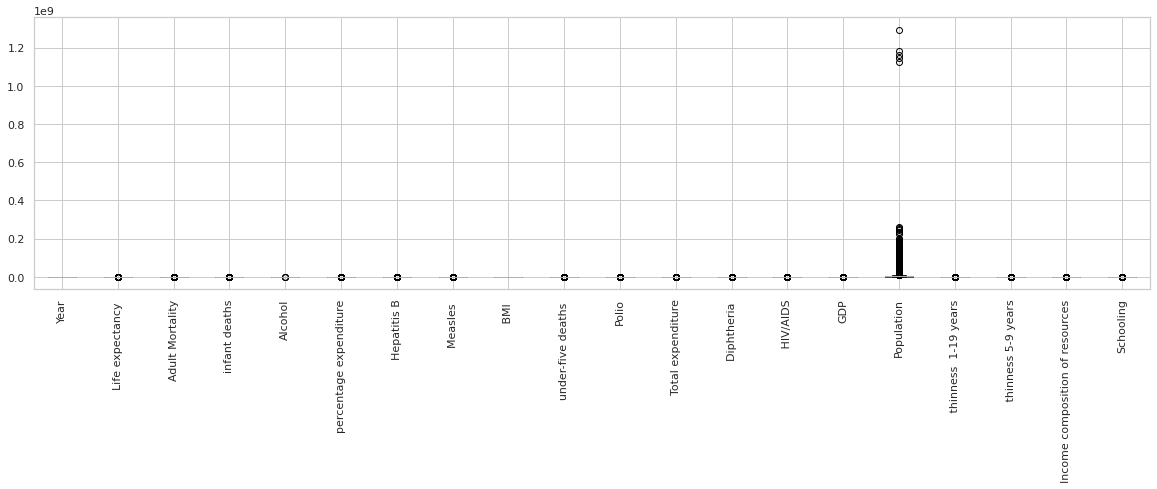

In [ ]:
# boxplot before removing the outliers
plt.figure(figsize = (20,5))
data.boxplot()
plt.xticks(rotation = 90)
plt.show()

Year and BMI has no outliers and others having the outliers, we can remove the outliers from these features. we can observe maximum outlier in 'Population' features.

In [ ]:
life_expectancy_df = data.copy()

In [ ]:
data1 = data.drop(['Population'], axis=1)

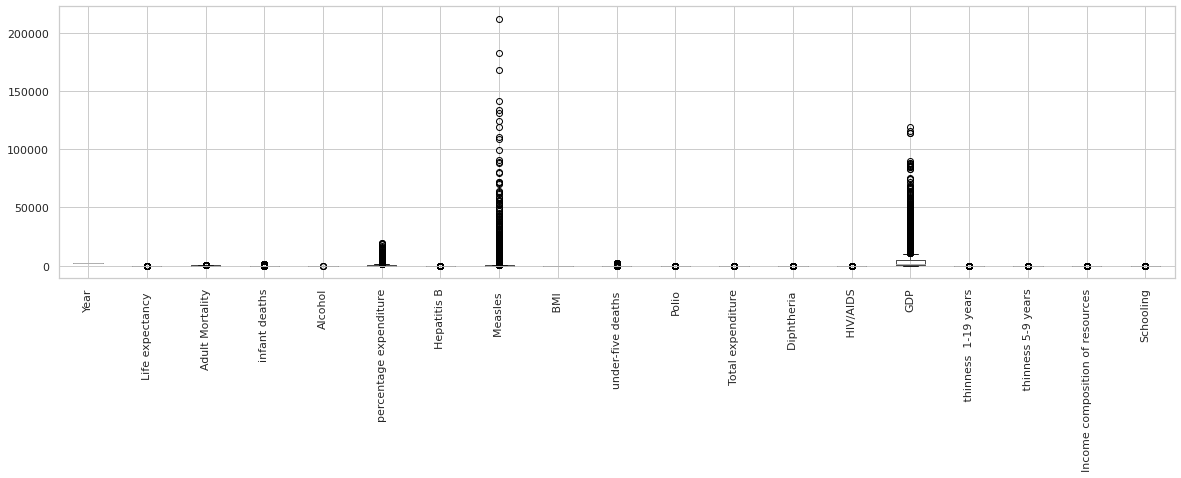

In [ ]:
plt.figure(figsize = (20,5))
data1.boxplot()
plt.xticks(rotation = 90)
plt.show()

we check for outliers in other columns after dropping the population column to observe the range of outliers.

In [ ]:
data2 = data.drop(['Country','Year','Status'], axis = 1)

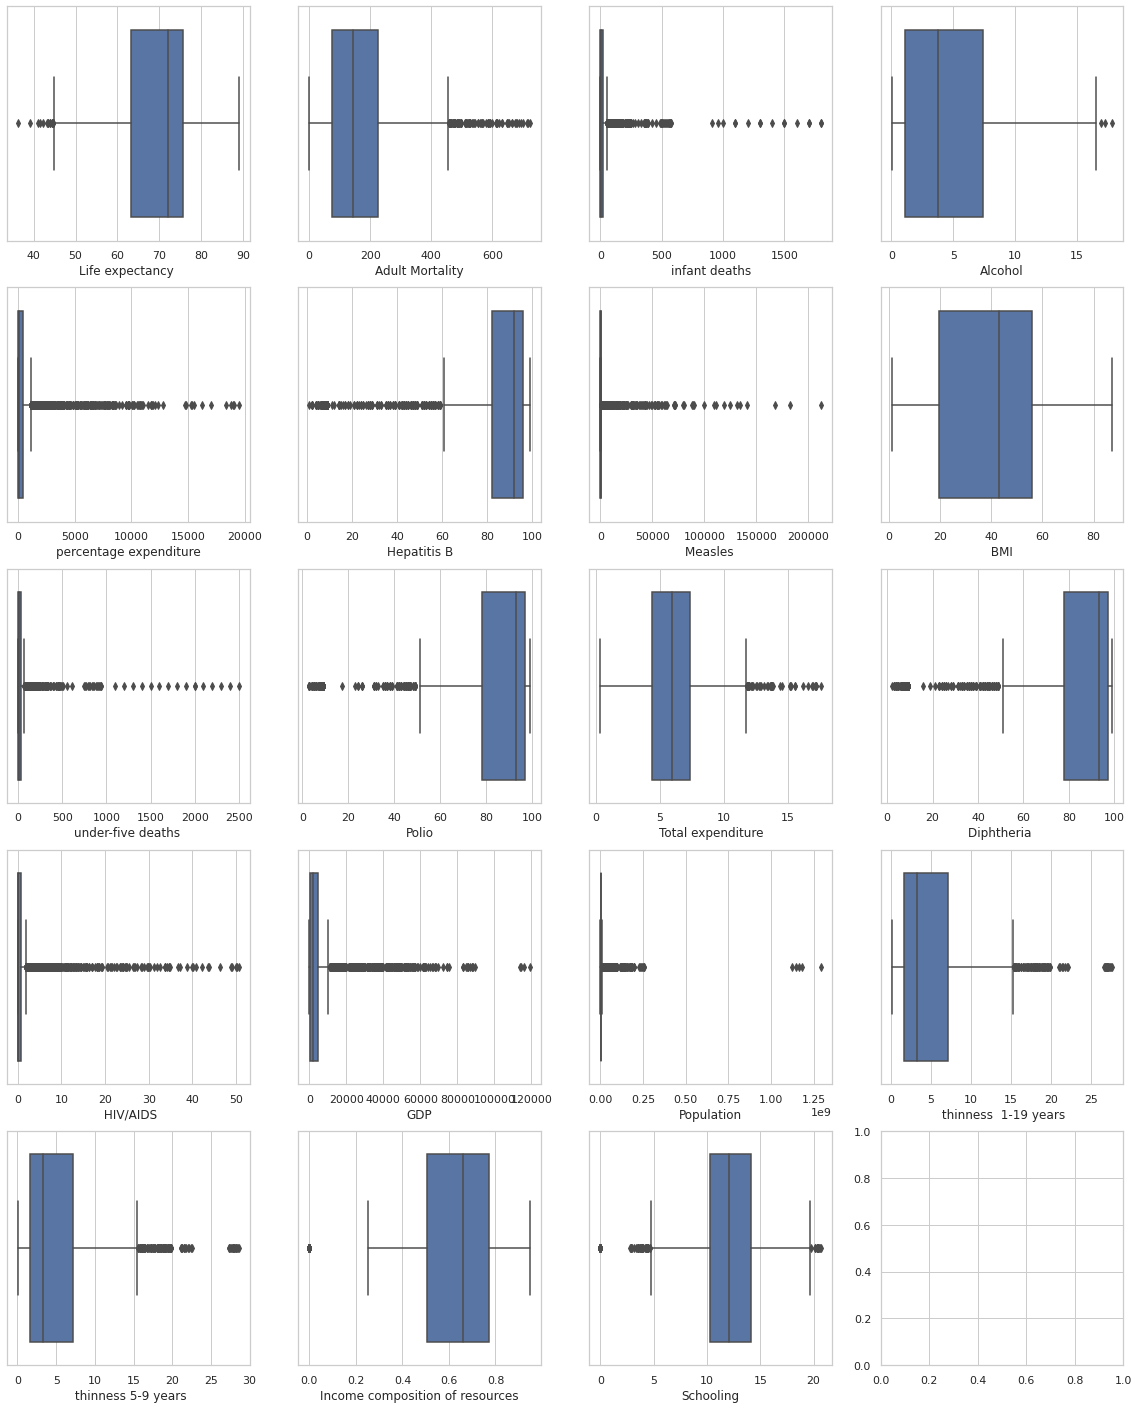

In [ ]:
fig,ax = plt.subplots(nrows = 5, ncols = 4, figsize = (20,25))

for variable, subplot in zip(data2.columns, ax.flatten()):
    sns.boxplot(data2[variable], ax = subplot)
plt.show()

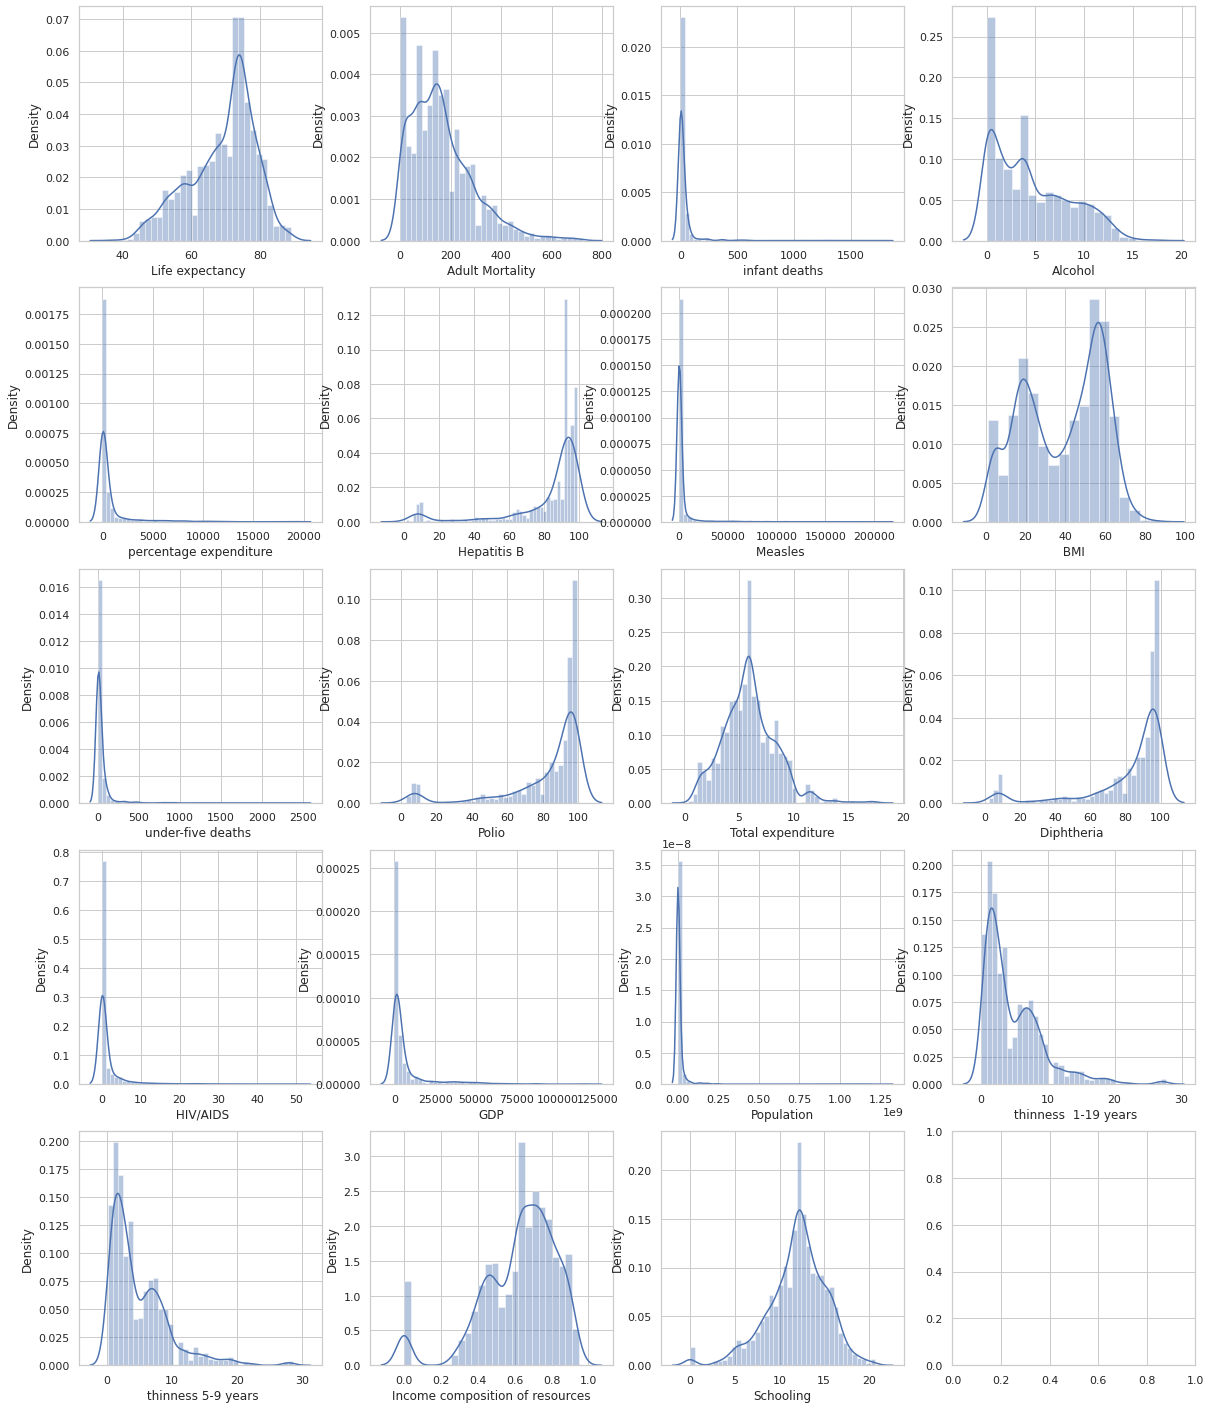

In [ ]:
fig,ax = plt.subplots(nrows = 5, ncols = 4, figsize = (20,25))

for variable, subplot in zip(data2.columns, ax.flatten()):
    sns.distplot(data2[variable], ax = subplot)
plt.show()

* the points ahead and after wiskers show presence of outliers
* each data point does not fall into a single bin in a histogram, but instead contributes a small volume of area to the total distribution.
* the distribution of the graph represents the distribution of outliers.

**Treating Outliers**

In [ ]:
# For removing outliers first we need to check the quartiles. It manages the outliers.
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

# check the inter quartile range (IQR)
iqr = q3 - q1

#check the lower and upper limit 
low_lm = q1 - (1.5 * iqr)
upp_lm = q3 + (1.5 * iqr)

In [ ]:
data3 = data[~((data < low_lm) |(data > upp_lm)).any(axis =1)]
data3.shape

(1058, 22)

If we choose to treat outliers using Inter Quartile Range we could lose about 50% of data which is not right perspective of looking at data.

Outliers tell us that the observations of the given data set or how the data points differ significantly from the overall perspective. Simply saying outlier. this would be an error during data collection but in our case its just the way our data is, in that case treating outliers would mean losing data from our dataset.

In case we treat outlier we will be loosing a large number of data points...

In [ ]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.321247,42.035739,82.617767,5.938190,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.627551,11.992793
std,4.613841,9.507640,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.927677,160.445548,23.367166,2.400274,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


* Average Life Expectany is about 69.23.
* Anomalies in the data :-
 * Max infant deaths per 1000 population is beyond 1000 which can be an anomaly.
 * range of Expenditure on health as a percentage of Gross 
 * Domestic Product per capita is high
 * Max measles per 1000 population is observed to be as high as 212183
 * BMI above 29 is considered to be obese but our dat has max BMI of 87 which is unrealistic.
 * these values could be anomalies or exceptions

For filling missing values with mean and median did not introduce observable changes in the dataset

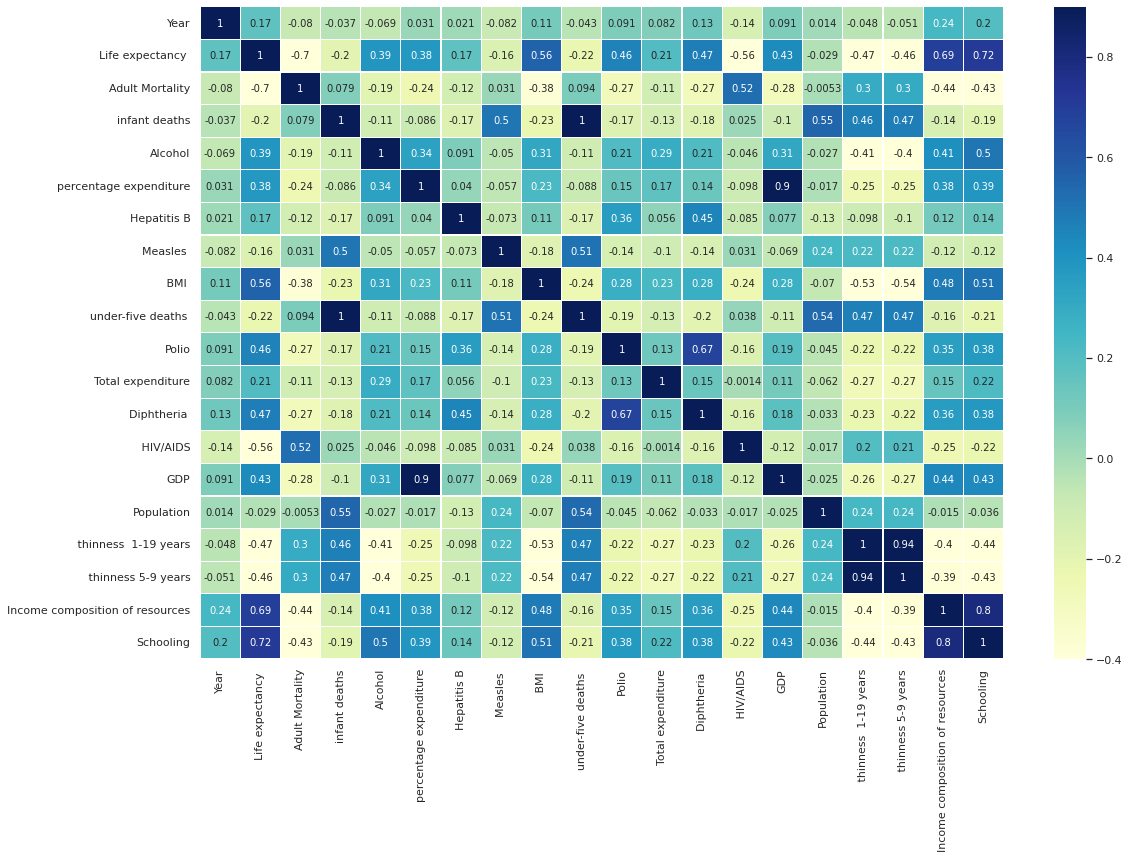

In [ ]:
# Correlation matrix
corrmatrix = data.corr()
plt.subplots(figsize=(18, 12))
sns.heatmap(corrmatrix, vmin=-0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

Observing the correlation heatmap we can see that:
* Life expectancy is positively correlated with resource income composition, GDP, diphtheria, polio, and percentage spending.
* Life expectancy is negatively correlated with Adult_mortality, Thinness_1-19_years, Thinness_5-9_years, HIV / AIDS, Under_five_deaths, and Infant_deaths.
* infant deaths is positively correlated with under-five deaths
* adult mortality is negatively correlated with life expectancy, income compositions of resources, schooling and positive correlated with HIV/AIDS
* GDP is positively correlated with percentage expenditure
* Diphtheria has a positively contributing high correlation with polio

**Encoding**

Now we can move to Enconding because there are two categorical features present in our data so we need to convert it into binary form. 

> In Machine Learning, we cannot continue with categorical features so we need to convert it into numerical form.

In [ ]:
# Lets check the data types of each features
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [ ]:
data['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

Here, Status feature is having two classes so we can go for one hot enconding method

In [ ]:
# One hot Encode with Status feature
data['Status'] = pd.get_dummies(data['Status'])

In [ ]:
data['Country'].nunique()

193

In [ ]:
data['Country'].value_counts()

Venezuela (Bolivarian Republic of)    16
Belize                                16
Gambia                                16
Grenada                               16
Zimbabwe                              16
                                      ..
Dominica                               1
Cook Islands                           1
Saint Kitts and Nevis                  1
Nauru                                  1
Marshall Islands                       1
Name: Country, Length: 193, dtype: int64

 Here, Country feature has two or more classes, hence we used label encoder to convert the categorical feature in to numerical form.

In [ ]:
# Label Encode with target 'Classification' feature
from sklearn.preprocessing import LabelEncoder
data['Country'] = LabelEncoder().fit_transform(data['Country'])

In [ ]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


**Scaling**

In [ ]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
y = data['Life expectancy ']
X = data.drop('Life expectancy ', axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)

from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("MSE is: ", mean_squared_error(y_test, predictions))
print("R Squared is: ", r2_score(y_test, predictions))

MSE is:  15.004705369862826
R Squared is:  0.8268060551604356


> The value of MSE is always positive or greater than zero. **A value close to zero will represent better quality of the estimator / predictor (regression model). An MSE of zero (0) represents the fact that the predictor is a perfect predictor.** When you take a square root of MSE value, it becomes root mean squared error (RMSE).

> R-Squared is the ratio of Sum of Squares Regression (SSR) and Sum of Squares Total (SST). Sum of Squares Regression is amount of variance explained by the regression line. R-squared value is used to measure the goodness of fit. **Greater the value of R-Squared, better is the regression model.**

**1. Min Max Scaler**

In [ ]:
X = data.drop('Life expectancy ', axis=1)

In [ ]:
X.describe()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,95.096324,2007.518720,0.174268,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.321247,42.035739,82.617767,5.938190,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.627551,11.992793
std,56.244904,4.613841,0.379405,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.927677,160.445548,23.367166,2.400274,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.204820,3.264381
min,0.000000,2000.000000,0.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,46.000000,2004.000000,0.000000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,93.000000,2008.000000,0.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.662000,12.100000
75%,145.000000,2012.000000,0.000000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,192.000000,2015.000000,1.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
from sklearn import preprocessing
Min_Max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = Min_Max.fit_transform(X)

In [ ]:
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,0.495293,0.501248,0.174268,0.226767,0.016836,0.254024,0.037898,0.836960,0.011403,0.432459,0.016814,0.829352,0.323168,0.828795,0.032517,0.055465,0.007907,0.171083,0.166742,0.661974,0.579362
std,0.292942,0.307589,0.379405,0.171865,0.065515,0.219594,0.102049,0.234663,0.054044,0.230912,0.064178,0.243408,0.139308,0.243872,0.100550,0.111576,0.041753,0.159334,0.157398,0.216055,0.157700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.239583,0.266667,0.000000,0.101108,0.000000,0.060610,0.000241,0.826531,0.000000,0.213210,0.000000,0.781250,0.232153,0.783505,0.000000,0.004857,0.000324,0.054348,0.052632,0.531909,0.497585
50%,0.484375,0.533333,0.000000,0.198061,0.001667,0.209686,0.003332,0.928571,0.000080,0.486674,0.001600,0.937500,0.323168,0.938144,0.000000,0.014813,0.001072,0.115942,0.112281,0.698312,0.584541
75%,0.755208,0.800000,0.000000,0.313019,0.012222,0.413214,0.022666,0.969388,0.001698,0.638470,0.011200,0.979167,0.403947,0.979381,0.013861,0.040091,0.003543,0.253623,0.249123,0.814346,0.681159
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print("MSE is: ", mean_squared_error(y_test, predictions))
print("R Squared is: ", r2_score(y_test, predictions))

MSE is:  15.004705369876307
R Squared is:  0.82680605516028


**2. Normalization**

In [ ]:
X = data.drop('Life expectancy ', axis=1)

In [ ]:
X.describe()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,95.096324,2007.518720,0.174268,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.321247,42.035739,82.617767,5.938190,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.627551,11.992793
std,56.244904,4.613841,0.379405,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.927677,160.445548,23.367166,2.400274,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.204820,3.264381
min,0.000000,2000.000000,0.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,46.000000,2004.000000,0.000000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,93.000000,2008.000000,0.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.662000,12.100000
75%,145.000000,2012.000000,0.000000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,192.000000,2015.000000,1.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
X = preprocessing.normalize(X)
X = pd.DataFrame(X)

In [ ]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2.938000e+03,2.938000e+03,2.938000e+03,2938.000000,2.938000e+03,2938.000000,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2.938000e+03,2938.000000,2.938000e+03,2.938000e+03,2.938000e+03,2938.000000
mean,0.001176,0.023766,0.000002,1.595158e-03,0.000073,4.902992e-05,4.703386e-03,9.954373e-04,0.007870,4.630851e-04,0.000102,1.015103e-03,7.456387e-05,1.014645e-03,1.519196e-05,4.056688e-02,0.974044,6.808549e-05,6.859236e-05,7.554512e-06,0.000145
std,0.005192,0.092416,0.000017,7.171165e-03,0.000731,2.580000e-04,1.960684e-02,4.111800e-03,0.061411,1.984357e-03,0.001072,4.174092e-03,3.168684e-04,4.184434e-03,3.122211e-04,1.420769e-01,0.126229,4.401512e-04,4.441705e-04,3.076481e-05,0.000574
min,0.000000,0.000002,0.000000,1.647078e-08,0.000000,5.389492e-11,0.000000e+00,5.086120e-09,0.000000,1.063981e-08,0.000000,3.098828e-08,3.585714e-09,4.508747e-08,1.545763e-10,6.801655e-08,0.004977,5.422949e-09,4.648242e-09,0.000000e+00,0.000000
25%,0.000012,0.000438,0.000000,1.981941e-05,0.000000,2.326670e-07,7.004108e-07,1.467387e-05,0.000000,5.946069e-06,0.000000,1.429421e-05,1.326744e-06,1.404013e-05,6.169489e-08,2.452562e-04,0.999875,5.682543e-07,5.430484e-07,1.033531e-07,0.000002
50%,0.000057,0.001448,0.000000,9.687156e-05,0.000001,1.902428e-06,4.142580e-05,6.635199e-05,0.000009,2.502188e-05,0.000002,6.707280e-05,3.988151e-06,6.692698e-05,1.444326e-07,1.274353e-03,0.999996,2.626959e-06,2.613182e-06,4.526007e-07,0.000009
75%,0.000207,0.004794,0.000000,3.198317e-04,0.000013,8.969129e-06,7.077180e-04,1.943348e-04,0.000211,8.685918e-05,0.000016,1.952232e-04,1.525254e-05,1.896623e-04,1.564941e-06,9.026341e-03,0.999999,8.209352e-06,8.311898e-06,1.303994e-06,0.000030
max,0.070766,0.979315,0.000462,1.878640e-01,0.022071,6.236459e-03,2.490805e-01,4.781906e-02,0.998908,2.949249e-02,0.033540,4.781906e-02,4.370680e-03,4.781906e-02,1.597004e-02,9.931982e-01,1.000000,7.141734e-03,7.190317e-03,3.508611e-04,0.006312


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
predictions = model.predict(X_test)
print("MSE is: ", mean_squared_error(y_test, predictions))
print("R Squared is: ", r2_score(y_test, predictions))

MSE is:  82.77968216823975
R Squared is:  0.04450375039827559


Normalization not good for our model as MSE is increased and r2 score is decreased but min max scaler is performing well with 82.68% r2 score but not closer to zero as MSE(15)

### 3. Exploratory Data Analysis

In [ ]:
life_expectancy_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

**Univariate and Bivariate Analysis** 

**Country**

Let's identify the number of countries represented in this dataset and plot 10 countries with highest life expectancies.

In [ ]:
life_expectancy_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
life_expectancy_df['Country'].nunique()

193

In [ ]:
life_expectancy_country_df = life_expectancy_df.groupby('Country')[life_expectancy_df.columns].mean()
life_expectancy_country_df.drop(columns=['Year'], inplace=True)
life_expectancy_country_df.reset_index(inplace=True)
life_expectancy_country_df

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.5625,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.0000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
2,Algeria,73.61875,108.1875,20.3125,0.615938,236.185241,81.5000,1943.8750,48.74375,23.5000,91.7500,4.687387,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
3,Angola,49.01875,328.5625,83.7500,5.616562,102.100268,79.7500,3561.3125,18.01875,132.6250,46.1250,4.045512,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.687188,1001.585226,97.8750,0.0000,38.42500,0.0000,96.9375,4.863012,98.3125,0.12500,9759.305728,1.386542e+06,3.42500,3.37500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.190937,0.000000,66.2500,165.0000,54.48750,10.7500,74.6875,5.057387,68.5000,0.10000,1766.947595,1.386542e+06,1.65000,1.56250,0.726812,12.78750
189,Viet Nam,74.77500,126.5625,29.1875,3.129063,0.000000,88.3750,4232.9375,11.18750,36.5000,94.9375,5.974887,91.7500,0.14375,1766.947595,1.386542e+06,14.92500,15.62500,0.627063,11.51250
190,Yemen,63.86250,211.8125,39.3750,0.279062,0.000000,55.6875,2761.1875,33.48750,51.6250,67.1250,5.063637,72.6250,0.10000,1766.947595,1.386542e+06,13.83125,13.75000,0.475500,8.50625
191,Zambia,53.90625,354.3125,33.4375,2.334062,89.650407,76.7500,6563.8125,17.45000,52.3750,64.3750,5.831137,74.2500,11.93125,811.811841,6.260246e+06,6.88125,6.76250,0.498437,11.21250


In [ ]:
country_status_df = life_expectancy_df.groupby('Country')['Status'].min()
country_status_df = country_status_df.reset_index()
country_status_df

,Country,Status
0,Afghanistan,Developing
1,Albania,Developing
2,Algeria,Developing
3,Angola,Developing
4,Antigua and Barbuda,Developing
...,...,...
188,Venezuela (Bolivarian Republic of),Developing
189,Viet Nam,Developing
190,Yemen,Developing
191,Zambia,Developing


In [ ]:
life_expectancy_country_df = life_expectancy_country_df.merge(country_status_df, on='Country')
life_expectancy_country_df

,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status
0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.5625,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,Developing
1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.0000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,Developing
2,Algeria,73.61875,108.1875,20.3125,0.615938,236.185241,81.5000,1943.8750,48.74375,23.5000,91.7500,4.687387,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,Developing
3,Angola,49.01875,328.5625,83.7500,5.616562,102.100268,79.7500,3561.3125,18.01875,132.6250,46.1250,4.045512,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,Developing
4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.687188,1001.585226,97.8750,0.0000,38.42500,0.0000,96.9375,4.863012,98.3125,0.12500,9759.305728,1.386542e+06,3.42500,3.37500,0.488625,8.84375,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.190937,0.000000,66.2500,165.0000,54.48750,10.7500,74.6875,5.057387,68.5000,0.10000,1766.947595,1.386542e+06,1.65000,1.56250,0.726812,12.78750,Developing
189,Viet Nam,74.77500,126.5625,29.1875,3.129063,0.000000,88.3750,4232.9375,11.18750,36.5000,94.9375,5.974887,91.7500,0.14375,1766.947595,1.386542e+06,14.92500,15.62500,0.627063,11.51250,Developing
190,Yemen,63.86250,211.8125,39.3750,0.279062,0.000000,55.6875,2761.1875,33.48750,51.6250,67.1250,5.063637,72.6250,0.10000,1766.947595,1.386542e+06,13.83125,13.75000,0.475500,8.50625,Developing
191,Zambia,53.90625,354.3125,33.4375,2.334062,89.650407,76.7500,6563.8125,17.45000,52.3750,64.3750,5.831137,74.2500,11.93125,811.811841,6.260246e+06,6.88125,6.76250,0.498437,11.21250,Developing


In [ ]:
top_countries_df = life_expectancy_country_df.sort_values(by=['Life expectancy '], ascending=False).head(10)

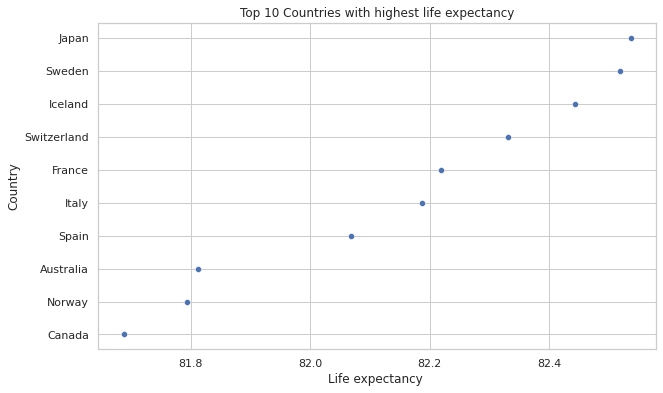

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Top 10 Countries with highest life expectancy')
sns.scatterplot(x=top_countries_df['Life expectancy '], y=top_countries_df['Country'])

**Alcohol**

To explore the distribution of alcohol comnsumption among countries, we will use histogram.

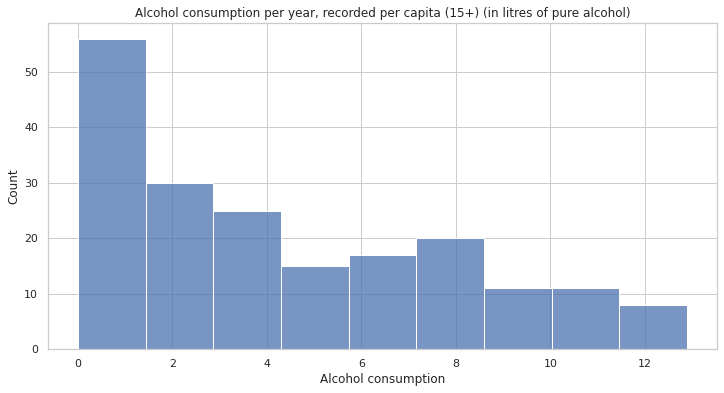

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Alcohol consumption per year, recorded per capita (15+) (in litres of pure alcohol)')
plt.xlabel('Alcohol consumption')
plt.ylabel('Count')

sns.histplot(x=life_expectancy_country_df['Alcohol'])
plt.show()

It seems that about half of the countries' alcohol cosumption per capita lies between 0 - 4 liters.

**Status**

To find out the distribution of status among the countries represented, we will use pie chart. It is a fact that only few countries fit to the developed category.

In [ ]:
status_counts = life_expectancy_country_df['Status'].value_counts()
status_counts

Developing    161
Developed      32
Name: Status, dtype: int64

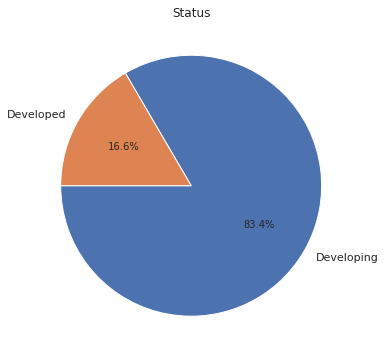

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Status')
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=180)
plt.show()

As expected, only 16.6% of the countries are classified as developed.

**Life Expectancy**

Now let's observe distribution of life expectancy, the main variable of this dataset, through histogram.

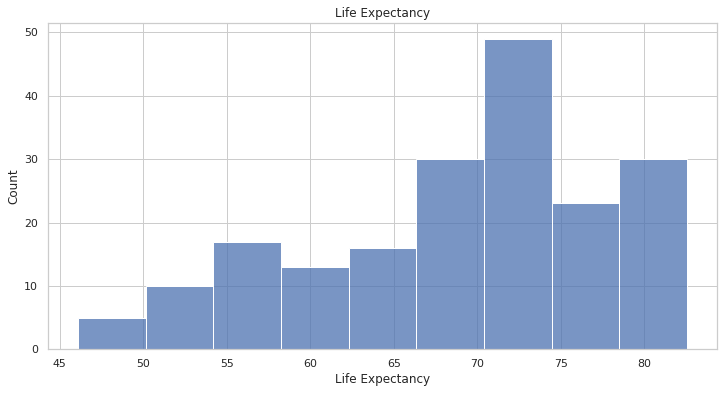

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Life Expectancy')
plt.ylabel('Count')
plt.xlabel('Life Expectancy')

sns.histplot(x=life_expectancy_country_df['Life expectancy '])

It appears that most countries have life expectancy above 60.

**Total percentage**

One of the main factors for a country's life expectancy is the government's health expenditure. To visualize how much percent countries are spending from their total government expenditure, we will plot a histogram.

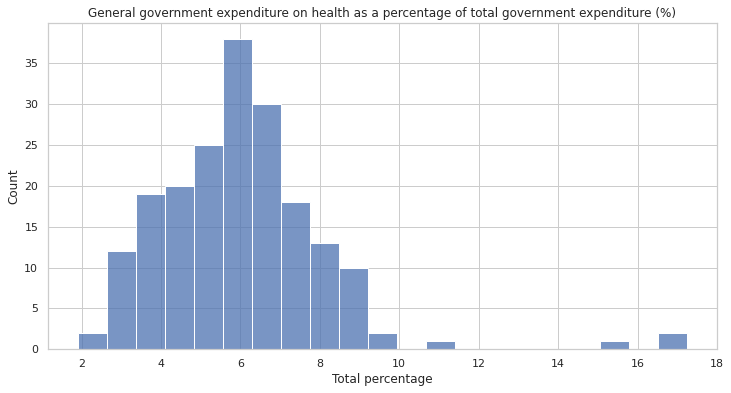

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('General government expenditure on health as a percentage of total government expenditure (%)')
plt.xlabel('Total percentage')
plt.ylabel('Count')

sns.histplot(x=life_expectancy_country_df['Total expenditure'])
plt.show()

As the plot shows, around most of the countries spend only 3%-8% of total government expenditure.

In [ ]:
# The most countries reached their highest life expectancy

highest_life_expectancy_per_country_df = life_expectancy_df.loc[life_expectancy_df.groupby('Country')['Life expectancy '].idxmax()]


In [ ]:
highest_LE_year_counts = highest_life_expectancy_per_country_df['Year'].value_counts()

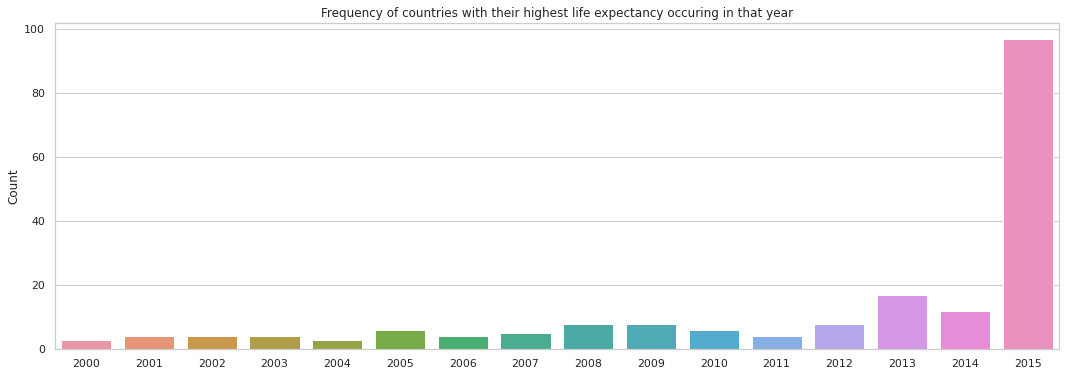

In [ ]:
plt.figure(figsize=(18, 6))
sns.barplot(x=highest_LE_year_counts.index, y=highest_LE_year_counts)
plt.title("Frequency of countries with their highest life expectancy occuring in that year");
plt.ylabel('Count')
plt.show()

Surprisingly, more than half of the countries reached their highest life expectancy in 2015.

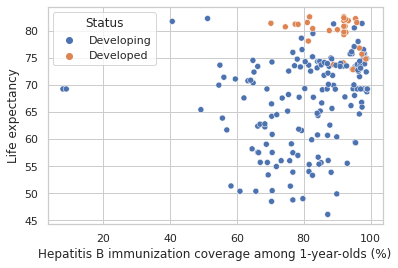

In [ ]:
# How important are Hepatitis B, Polio and Diphtheria immunization coverage to life expectancy?
sns.scatterplot(x='Hepatitis B', y='Life expectancy ', hue='Status', data=life_expectancy_country_df)
plt.xlabel("Hepatitis B immunization coverage among 1-year-olds (%)");
plt.ylabel("Life expectancy")
plt.show()

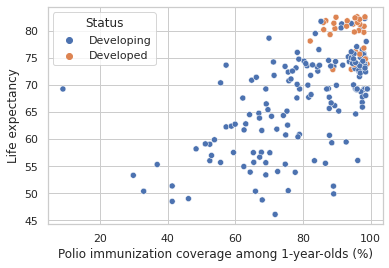

In [ ]:
sns.scatterplot(x='Polio', y='Life expectancy ', hue='Status', data=life_expectancy_country_df)
plt.xlabel("Polio immunization coverage among 1-year-olds (%)");
plt.ylabel("Life expectancy")
plt.show()

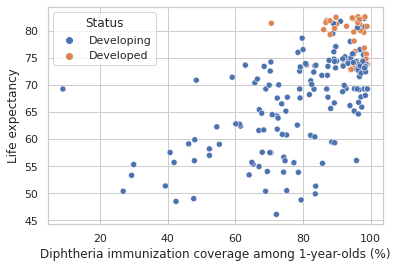

In [ ]:
sns.scatterplot(x='Diphtheria ', y='Life expectancy ', hue='Status', data=life_expectancy_country_df)
plt.xlabel("Diphtheria immunization coverage among 1-year-olds (%)");
plt.ylabel("Life expectancy")
plt.show()

Despite few exceptions, in general we can say high hepatitis B, polio and diphtheria immunization coverage contributes to high life expectancy.

### 4. Modelling

In [ ]:
# Function to apply Regression algorithms and return the results of models

# libraries for ML Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# libraries for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

def predictive_models():
    algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), 
                  RandomForestRegressor(n_estimators = 100, random_state = 0)]
    
    algorithm_names = ["Linear Regression","SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]
    
    # Errors for training data
    Mean_Squared_Error_Training = []
    Mean_Absolute_Error_Training = []
    Accuracy_Training = []
    
    # Errors for testing data
    Mean_Squared_Error_Testing = []
    Mean_Absolute_Error_Testing = []
    Accuracy_Testing = []
    
    # Regression models
    for i in algorithms:
        model = i
        model.fit(X_train,y_train)
    
        y_test_predict = model.predict(X_test)
        y_train_predict = model.predict(X_train)
            
        mse_1 = round(mean_squared_error(y_train, y_train_predict),4)
        mae_1 = round(mean_absolute_error(y_train, y_train_predict),4)
        
        mse_2 = round(mean_squared_error(y_test, y_test_predict),4)
        mae_2 = round(mean_absolute_error(y_test, y_test_predict),4)
        
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Training.append(mse_1)
        Mean_Absolute_Error_Training.append(mae_1)
                
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Testing.append(mse_2)
        Mean_Absolute_Error_Testing.append(mae_2)
        
    # Creating DataFrame for Logs of Models and their errors    
    before_scale_results = pd.DataFrame({"Models":algorithm_names,
                            "Mean Squared Error Training":Mean_Squared_Error_Training,
                            "Mean Absolute Error Training":Mean_Absolute_Error_Training,      
                            "Mean Squared Error Testing":Mean_Squared_Error_Testing,
                            "Mean Absolute Error Testing":Mean_Absolute_Error_Testing})

    return before_scale_results

In [ ]:
# Before feature scaling
before_scale_results = predictive_models()
before_scale_results

,Models,Mean Squared Error Training,Mean Absolute Error Training,Mean Squared Error Testing,Mean Absolute Error Testing
0,Linear Regression,84.3247,7.4604,82.7797,7.4266
1,SVR,94.9197,7.3319,91.9459,7.2863
2,KNeighbors Regressor,28.8413,3.7817,42.4141,4.5533
3,Decision-Tree Regressor,0.0000,0.0000,17.5058,2.6221
4,Random-Forest Regressor,1.3796,0.7747,7.4308,1.8213


As per the results Linear Regression and SVR performed good scores but KNeighbors Regressor, Decision-Tree Regressor and Random-Forest Regressor not for good modeling in Life Expectancy (WHO) dataset.

In [ ]:
# Feacture Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def predictive_models():
    algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), 
                  RandomForestRegressor(n_estimators = 100, random_state = 0)]
    
    algorithm_names = ["Linear Regression","SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]
    
    # Errors for training data
    Mean_Squared_Error_Training = []
    Mean_Absolute_Error_Training = []
    Accuracy_Training = []
    
    # Errors for testing data
    Mean_Squared_Error_Testing = []
    Mean_Absolute_Error_Testing = []
    Accuracy_Testing = []
    
    # Regression models
    for i in algorithms:
        model = i
        model.fit(X_train,y_train)
    
        y_test_predict = model.predict(X_test)
        y_train_predict = model.predict(X_train)
            
        mse_1 = round(mean_squared_error(y_train, y_train_predict),4)
        mae_1 = round(mean_absolute_error(y_train, y_train_predict),4)
        
        mse_2 = round(mean_squared_error(y_test, y_test_predict),4)
        mae_2 = round(mean_absolute_error(y_test, y_test_predict),4)
        
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Training.append(mse_1)
        Mean_Absolute_Error_Training.append(mae_1)
                
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Testing.append(mse_2)
        Mean_Absolute_Error_Testing.append(mae_2)
        
    # Creating DataFrame for Logs of Models and their errors    
    after_scale_results = pd.DataFrame({"Models":algorithm_names,
                            "Mean Squared Error Training":Mean_Squared_Error_Training,
                            "Mean Absolute Error Training":Mean_Absolute_Error_Training,      
                            "Mean Squared Error Testing":Mean_Squared_Error_Testing,
                            "Mean Absolute Error Testing":Mean_Absolute_Error_Testing})

    return after_scale_results

In [ ]:
# After feature scaling
after_scale_results = predictive_models()
after_scale_results

,Models,Mean Squared Error Training,Mean Absolute Error Training,Mean Squared Error Testing,Mean Absolute Error Testing
0,Linear Regression,84.3247,7.4604,82.7797,7.4266
1,SVR,85.2131,6.8456,83.8922,6.8788
2,KNeighbors Regressor,10.2123,2.1464,16.6059,2.6036
3,Decision-Tree Regressor,0.0000,0.0000,12.5850,2.3057
4,Random-Forest Regressor,1.1653,0.7240,5.5655,1.6295


As you can see after the sacling the models score decreased. so it is better to keep the best value before scaling.

### 5. Model fine tuning

**Hyperparameter Optimization for Regression**

**1. Random Search for Regression**
**2. Grid Search for Regression**

A range of different optimization algorithms may be used, although two of the simplest and most common methods are random search and grid search.

* Random Search for regression: Define a search space as a bounded domain of hyperparameter values and randomly sample points in that domain.
* Grid Search for regression: Define a search space as a grid of hyperparameter values and evaluate every position in the grid.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rfr = RandomForestRegressor(random_state = 1)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                           cv = 5, n_jobs = -1, verbose = 0, return_train_score=True)
grid_search.fit(X_train, y_train);
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 88.95 %
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}
